<a href="https://colab.research.google.com/github/roilhi/MetNum_ITECI_2020/blob/gh-pages/CotaKaren_TrabajoFinalMetNum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad de Ensenada

**Curso de Métodos Numéricos**

*Repaso y Programación de algunos métodos vistos*

**Karen Nohemy Cota Quezada**

Unidad 1: Raíces de ecuaciones.

In [ ]:
# Primero importamos las librerías necesarias
import numpy as np # Librería numérica
import sympy # Procesamiento simbólico
import matplotlib.pyplot as plt # Librería para las gráficas

Cálculo del error relativo porcentual, nos servirá para todos los métodos.
$$\epsilon_r = \left \lvert \frac {V_r-Vn}{Vn} \right \rvert \times 100$$

In [ ]:
# Función que calcule el error relativo porcentual
def ErrorRelativo (vreal, vnum):
  epsilon = abs((vreal-vnum)/vreal)*100
  return epsilon



*   Método de bisección

Estimar la raíz de la función $f(x)=x-\cos(x)$ en el intervalo $[0.5, 1]$


In [ ]:
# Valores iniciales
a =0.5
b =1
Vanalítico =0.73909
def fx(x_int):
  fx = x_int-np.cos(x_int)
  return fx

In [ ]:
numIter = 0
N = int(input('Defina un número N de iteraciones'))
x_old =0
while numIter<N:
  x_i = (a+b)/2
  if fx(a)*fx(x_i)<0:
    b = x_i
  elif fx(a)*fx(x_i)==0:
    raizAproxBisec = x_i
  else:
    a = x_i
  numIter = numIter+1
  raizAproxBisec = x_i
  ErrorBisec = ErrorRelativo(raizAproxBisec,x_old)
  x_old = x_i
  print("La raíz estimada por el método de bisección es =",+raizAproxBisec, "iteración i =",+numIter)
  print("El error relativo es =",+ErrorBisec, "iteración i =",+numIter)

Defina un número N de iteraciones10
La raíz estimada por el método de bisección es = 0.75 iteración i = 1
El error relativo es = 100.0 iteración i = 1
La raíz estimada por el método de bisección es = 0.625 iteración i = 2
El error relativo es = 20.0 iteración i = 2
La raíz estimada por el método de bisección es = 0.6875 iteración i = 3
El error relativo es = 9.090909090909092 iteración i = 3
La raíz estimada por el método de bisección es = 0.71875 iteración i = 4
El error relativo es = 4.3478260869565215 iteración i = 4
La raíz estimada por el método de bisección es = 0.734375 iteración i = 5
El error relativo es = 2.127659574468085 iteración i = 5
La raíz estimada por el método de bisección es = 0.7421875 iteración i = 6
El error relativo es = 1.0526315789473684 iteración i = 6
La raíz estimada por el método de bisección es = 0.73828125 iteración i = 7
El error relativo es = 0.5291005291005291 iteración i = 7
La raíz estimada por el método de bisección es = 0.740234375 iteración i = 8

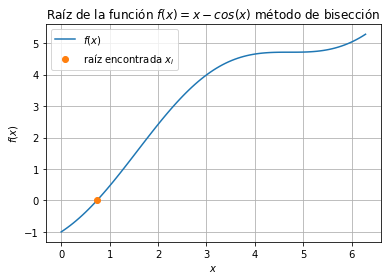

In [ ]:
# Datos para la graficación
ejeX = np.linspace(0,2*np.pi,101)
# Graficando la función
plt.plot(ejeX,fx(ejeX), label='$f(x)$')
# Graficar la raíz encontrada en el método
plt.plot(raizAproxBisec,fx(raizAproxBisec), 'o', label= 'raíz encontrada $x_i$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Raíz de la función $f(x)=x-cos(x)$ método de bisección')
plt.legend() # Muestra la leyenda
plt.grid() # Muestra la cuadrícula
plt.show() # Muestra la gráfica

Unidad 2: Interpolación Numérica



*   Método de interpolación de Lagrange





Se reformula el polinomio de Newton evitando el cálculo de las diferencias divididas.

$f_n(x)=\sum_{i=1}^{n}L_i(x)f(x_i)$

Donde los valores Li's son los coeficientes de Lagrange y se calculan mediante.


$L_i(x)=\prod_{j=0\;\;j\neq i}^{n}\frac{x-x_j}{x_i-x_j}$

In [ ]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
def arg_prod(i, j):
    """ Argumento de las bases polinómicas de 
    Lagrange.
    """
    # Variable simbólica
    x_sim = sympy.symbols('x')
    return (x_sim-x[i]) / (x[j]-x[i]) if i != j else 1

def interpolacion_lagrange(x, y, num_puntos=100):
    """ Estima la curva generada por el polinomio de lagrange que 
    interpola los puntos datos
    
    args:
        x (np.array): Datos del eje x
        y (np.array): Datos del eje y
        num_puntos (int): Número de puntos estimados a partir del polinomio
    
    returns:
        Puntos (x, y) estimados a partir del polinomio encontrado. Tupla
    """
    # Variable simbólica
    x_sim = sympy.symbols('x')
    
    # Número de puntos ingresados
    points = len(x)
    
    # Bases polinómicas lj = [l1, l2, ..., lk]
    lj = []
    for k in range(points):
        lk = np.prod([arg_prod(i, k) for i in range(points)])
        lj.append(lk)

    # Polinomio de lagrange
    pol = sum(y*lj)
    
    # Se generan los datos x, y a partir del polinomio encontrado
    x_test = np.linspace(min(x), max(x), num_puntos)
    y_pol = [pol.subs(x_sim, i) for i in x_test]
    
    return x_test, y_pol


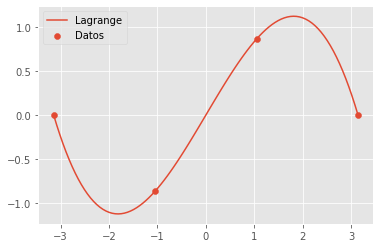

In [ ]:
# Datos
x = np.linspace(-np.pi, np.pi, 4)
y = np.array([np.sin(i) for i in x])

# Puntos generados por el polinomio de Lagrange
x_test, y_pol = interpolacion_lagrange(x, y)

# Gráfica
plt.plot(x_test, y_pol)
plt.scatter(x, y)
plt.legend(['Lagrange', 'Datos'], loc='best')

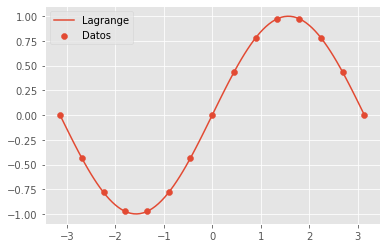

In [ ]:
# Datos
x = np.linspace(-np.pi, np.pi, 15)
y = np.array([np.sin(i) for i in x])

# Puntos generados por el polinomio de Lagrange
x_test, y_pol = interpolacion_lagrange(x, y)

# Gráfica
plt.plot(x_test, y_pol)
plt.scatter(x, y)
plt.legend(['Lagrange', 'Datos'], loc='best')

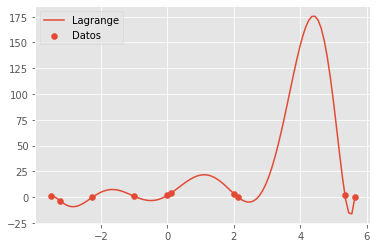

In [ ]:
# Datos 
x = np.array([-3.2300, 2.0000, -1.0023, 0.0000, 2.1230, 
              -3.5120, 0.1223, 5.6420, -2.2574, 5.3410])
y = np.array([-3.4360, 3.4120, 0.9300, 1.5960, 0.0000, 
              0.9315,  4.1230, 0.0140, -0.2320, 2.123])

# Puntos generados por el polinomio de Lagrange
x_test, y_pol = interpolacion_lagrange(x, y)

# Gráfica
plt.plot(x_test, y_pol)
plt.scatter(x, y)
plt.legend(['Lagrange', 'Datos'], loc='best')

Unidad 3: Diferenciación e integración numérica




*   Método del trapecio

Se tiene cuando la función polinomios que aproxima a Newton-Cotes es un polinomio de orden 1 (lineal).

Regla del trapecio:

$I≈(b-a)\frac {f(a)+f(b)} {2}$

In [ ]:
def f(x):
  return (x*x)

  def trapecio_simple (a,b):
    if (b>a):
      return 0.5*(f(a)+f(b))*(b-a)

    def trapecio_compuesto (a,b):
      i=a
      h=1E-6
      area= 0.0
      while (i<=b):
        if (i+h<=b):
          area = area+trapecio_simple(i,i+h)
          i= i+h
          return area

          if __name__ == "__main__":
            print ("Area =") +str(trapecio_simple(0,1))

Unidad 4: Sistemas de ecuaciones lineales.



*   Método de eliminación de Gauss Jordan

Demostrar que $x=2, y=1, z=-2$ son las soluciones del sistema de ecuaciones lineales:


$x+2y+z= 2$

$3x+8y+z = 1$

 $4y+z = -2$


In [ ]:
# Método de Gauss-Jordan
# Solución a Sistemas de Ecuaciones

import numpy as np

# INGRESO
A = np.array([[1,2,1],
              [3,8,1],
              [0,4,1]])

B = np.array([[2],
              [12],
              [2]])

# PROCEDIMIENTO
casicero = 1e-15 # Considerar como 0
# Evitar truncamiento en operaciones
A = np.array(A,dtype=float) 

# Matriz aumentada
AB = np.concatenate((A,B),axis=1)
AB0 = np.copy(AB)

# Pivoteo parcial por filas
tamano = np.shape(AB)
n = tamano[0]
m = tamano[1]

# Para cada fila en AB
for i in range(0,n-1,1):
    # columna desde diagonal i en adelante
    columna = abs(AB[i:,i])
    dondemax = np.argmax(columna)
    
    # dondemax no está en diagonal
    if (dondemax !=0):
        # intercambia filas
        temporal = np.copy(AB[i,:])
        AB[i,:] = AB[dondemax+i,:]
        AB[dondemax+i,:] = temporal
AB1 = np.copy(AB)

# eliminacion hacia adelante
for i in range(0,n-1,1):
    pivote = AB[i,i]
    adelante = i+1
    for k in range(adelante,n,1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
AB2 = np.copy(AB)

# elimina hacia atras
ultfila = n-1
ultcolumna = m-1
for i in range(ultfila,0-1,-1):
    pivote = AB[i,i]
    atras = i-1 
    for k in range(atras,0-1,-1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
    # diagonal a unos
    AB[i,:] = AB[i,:]/AB[i,i]
X = np.copy(AB[:,ultcolumna])
X = np.transpose([X])


# SALIDA
print('Matriz aumentada:')
print(AB0)
print('Pivoteo parcial por filas')
print(AB1)
print('eliminacion hacia adelante')
print(AB2)
print('eliminación hacia atrás')
print(AB)
print('solución de X: ')
print(X)

Matriz aumentada:
[[ 1.  2.  1.  2.]
 [ 3.  8.  1. 12.]
 [ 0.  4.  1.  2.]]
Pivoteo parcial por filas
[[ 3.  8.  1. 12.]
 [ 0.  4.  1.  2.]
 [ 1.  2.  1.  2.]]
eliminacion hacia adelante
[[ 3.          8.          1.         12.        ]
 [ 0.          4.          1.          2.        ]
 [ 0.          0.          0.83333333 -1.66666667]]
eliminación hacia atrás
[[ 1.  0.  0.  2.]
 [ 0.  1.  0.  1.]
 [ 0.  0.  1. -2.]]
solución de X: 
[[ 2.]
 [ 1.]
 [-2.]]


Al final de este ejercicio se comprobó que el valor de $x=2, y=1, z=-2$.